#### Q1

In [2]:
import pandas as pd

s = pd.read_csv("social_media_usage.csv")
print(s.shape)
print(s.dtypes)

(1502, 89)
respid          int64
sample          int64
comp            int64
int_date       object
lang            int64
               ...   
ql1            object
ql1a           object
qc1            object
weight        float64
cellweight     object
Length: 89, dtype: object


***

#### Q2

In [23]:
import numpy as np

def clean_sm(x):
    return np.where(x == 1, 1, 0)

toy = {"Column 1" : [9,1,11],
       "Column 2" : [20,14,1]}
toy_df = pd.DataFrame(toy)
toy_df_2 = toy_df.applymap(clean_sm)
print(toy_df)
print(toy_df_2)

   Column 1  Column 2
0         9        20
1         1        14
2        11         1
   Column 1  Column 2
0         0         0
1         1         0
2         0         1


***

#### Q3

In [21]:
ss_data = {"sm_li" : s["web1h"],
           "income" : s["income"],
           "education" : s["educ2"],
           "parent" : s["par"],
           "married" : s["marital"],
           "female" : s["gender"],
           "age": s["age"]}

ss = pd.DataFrame(ss_data)
print(ss.head)


<bound method NDFrame.head of       sm_li  income  education  parent  married  female  age
0         2       6          4       2        5       2   77
1         2       5          3       2        6       1   59
2         2       8          4       2        1       2   60
3         2       8          8       2        6       1   73
4         1       7          8       2        1       2   65
...     ...     ...        ...     ...      ...     ...  ...
1497      2       6          4       1        1       1   41
1498      1       2          5       2        2       1   46
1499      2       7          3       2        6       1   18
1500      2       4          3       2        6       2   23
1501      2       4          3       1        1       1   50

[1502 rows x 7 columns]>


In [25]:
ss["sm_li"] = ss["sm_li"].apply(clean_sm)
print(ss["sm_li"])

0       0
1       0
2       0
3       0
4       1
       ..
1497    0
1498    1
1499    0
1500    0
1501    0
Name: sm_li, Length: 1502, dtype: int64


In [44]:
ss["female"] = np.where(ss["female"] == 2, 1, 0)
ss["married"] = np.where(ss["married"] == 1, 1, 0)
ss["parent"] = np.where(ss["parent"] == 1, 1, 0)

print(ss["female"])
print(ss["married"])
print(ss["parent"])

0       0
1       0
2       0
3       0
4       0
       ..
1497    0
1498    0
1499    0
1500    0
1501    0
Name: female, Length: 1260, dtype: int32
0       1
1       1
2       1
3       1
4       1
       ..
1497    1
1498    1
1499    1
1500    1
1501    1
Name: married, Length: 1260, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
1497    1
1498    0
1499    0
1500    0
1501    1
Name: parent, Length: 1260, dtype: int32


In [45]:
ss["income"] = np.where((ss["income"] > 9), np.nan, ss["income"])
ss["age"] = np.where((ss["age"] > 98), np.nan, ss["age"])
ss["education"] = np.where((ss["education"] > 8), np.nan, ss["education"])

ss.dropna(subset=["income", "age", "education"], inplace=True)

ss.isnull().sum()

print(ss.head())
print(ss.isnull())

   sm_li  income  education  parent  married  female   age
0      0     6.0        4.0       0        1       0  77.0
1      0     5.0        3.0       0        1       0  59.0
2      0     8.0        4.0       0        1       0  60.0
3      0     8.0        8.0       0        1       0  73.0
4      1     7.0        8.0       0        1       0  65.0
      sm_li  income  education  parent  married  female    age
0     False   False      False   False    False   False  False
1     False   False      False   False    False   False  False
2     False   False      False   False    False   False  False
3     False   False      False   False    False   False  False
4     False   False      False   False    False   False  False
...     ...     ...        ...     ...      ...     ...    ...
1497  False   False      False   False    False   False  False
1498  False   False      False   False    False   False  False
1499  False   False      False   False    False   False  False
1500  False   Fa

c:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


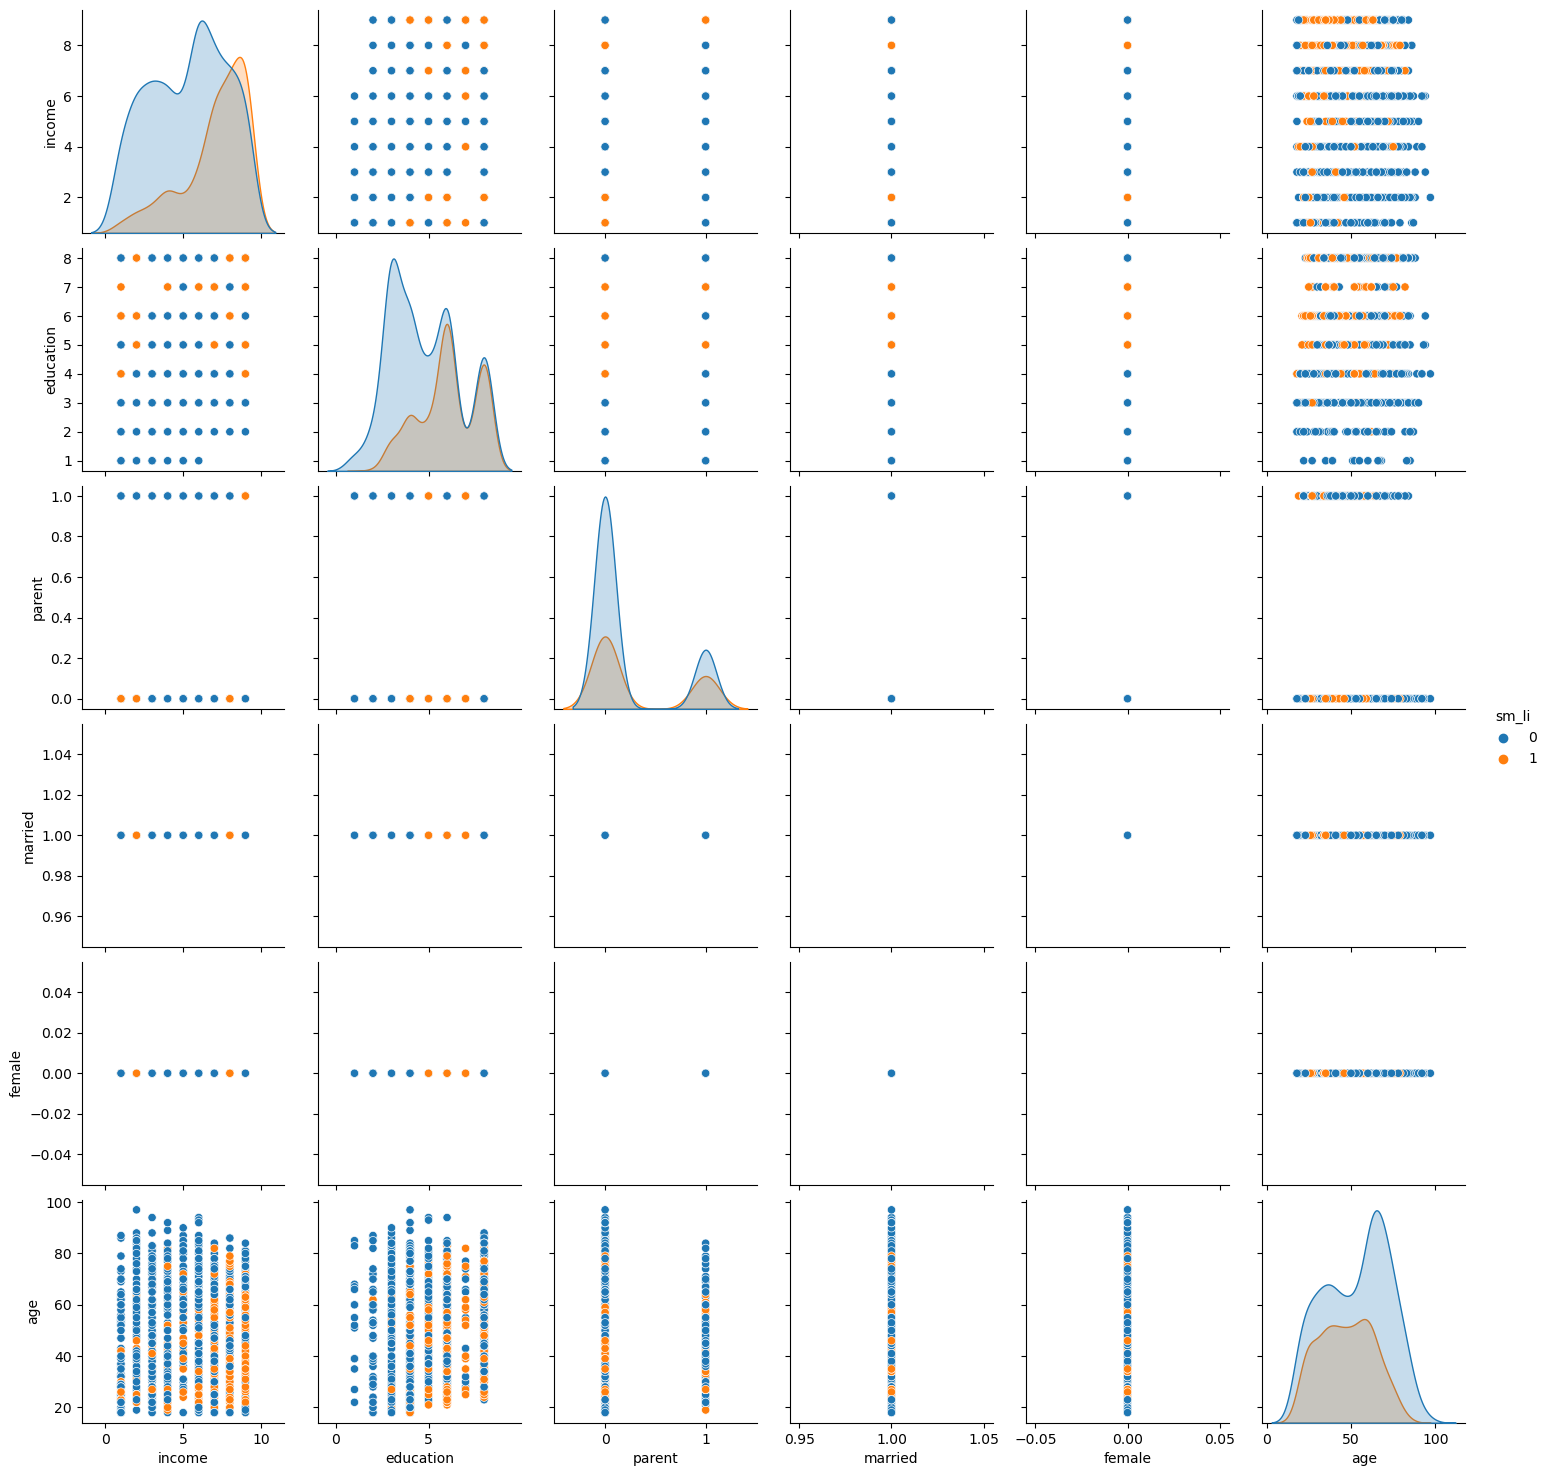

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(ss, hue = "sm_li", diag_kind = "kde")
plt.show()

***

#### Q4

In [47]:
# Target Vector
y = ss["sm_li"]

# Feature Set
x = ss.drop(columns=["sm_li"])

# Displaying
print(y.head())
print(x.head())

0    0
1    0
2    0
3    0
4    1
Name: sm_li, dtype: int64
   income  education  parent  married  female   age
0     6.0        4.0       0        1       0  77.0
1     5.0        3.0       0        1       0  59.0
2     8.0        4.0       0        1       0  60.0
3     8.0        8.0       0        1       0  73.0
4     7.0        8.0       0        1       0  65.0


***

#### Q5 - need to add text

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= .2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1008, 6)
(252, 6)
(1008,)
(252,)


***

#### Q6

In [54]:
from sklearn.linear_model import LogisticRegression

# Model
lr_model = LogisticRegression(class_weight="balanced")

# Fitting Model with Training Data
lr_model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

***

#### Q7

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on Test Data
Y_pred = lr_model.predict(X_test)

# Accuracy
model_accuracy = accuracy_score(Y_test, Y_pred)
print(model_accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)


0.6984126984126984
[[118  57]
 [ 19  58]]


***

#### Q8

In [68]:
confusion_df = pd.DataFrame(conf_matrix, columns= ["Actual LinkedIn User", "Actual Non-LinkedIn User"], index=["Predicted LinkedIn User", "Predictive Non-LinkedIn User"])
print(confusion_df)

                              Actual LinkedIn User  Actual Non-LinkedIn User
Predicted LinkedIn User                        118                        57
Predictive Non-LinkedIn User                    19                        58


***

#### Q9

In [62]:
# Calculations
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)
print(precision)
print(recall)
print(f1_score)

# Classification Report 
class_report = classification_report(Y_test, Y_pred)
print(class_report)

0.5043478260869565
0.7532467532467533
0.6041666666666666
              precision    recall  f1-score   support

           0       0.86      0.67      0.76       175
           1       0.50      0.75      0.60        77

    accuracy                           0.70       252
   macro avg       0.68      0.71      0.68       252
weighted avg       0.75      0.70      0.71       252



***

#### Q10

In [65]:
# Person 1 DF
person1 = pd.DataFrame({
    'income': [8],
    'education': [7],
    'parent': [0],
    'married': [1],
    'female': [1],
    'age': [42]
})

# Person 2 DF
person2 = pd.DataFrame({
    'income': [8],
    'education': [7],
    'parent': [0],
    'married': [1],
    'female': [1],
    'age': [82] 
})

# Predictions
probabilities_person1 = lr_model.predict_proba(person1)[:, 1]
probabilities_person2 = lr_model.predict_proba(person2)[:, 1]
print(probabilities_person1)
print(probabilities_person2)

[0.74973477]
[0.51082457]
